In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample

In [113]:
def voronoi(data, centroid):
    C = []
    for i in range(data.shape[0]):
        min_dist = 100000
        
        for j in range(centroid.shape[0]):
            a = data.iloc[i,:] - centroid.iloc[j,:]
            dist = np.linalg.norm(a) # gives 2 norm for the elements of list
            if (dist < min_dist):
                min_id = j
                min_dist = dist
        C.append(min_id)
    return C     

In [114]:
def cluster_cen(data,C):
    X = data.copy()
    X["C"] = C
    new_cen = X.groupby(["C"]).mean()
    return new_cen

In [115]:
def cost(data, C, centroid):
    tot_dist = 0
    for i in range(data.shape[0]):
        a = data.iloc[i,:] - centroid.iloc[C[i],:]
        tot_dist += (np.linalg.norm(a))**2
    return tot_dist

In [116]:
def k_means(data,k):
    centroid = data.sample(k)
    cen_diff = 10
    while(np.linalg.norm(cen_diff) > 0):
        C = voronoi(data, centroid)
        new_cen = cluster_cen(data,C)
        cen_diff = []
        for i in range(centroid.shape[0]):
            temp = new_cen.iloc[i,:] - centroid.iloc[i,:]
            cen_diff = temp
        centroid = new_cen
    ObjVal = cost(data, C, centroid)
    return C, centroid, ObjVal

In [117]:
data = pd.read_csv(f"clustering.csv", header = None)

In [118]:
C, centroid, price = k_means(data,2)

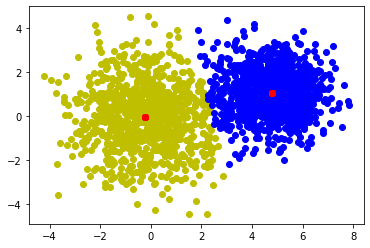

In [119]:
color = ['y', 'blue', 'green', 'cyan', 'black', 'brown']
for m in range(len(color)):
    id = []
    for i in range(len(C)):
        if (C[i] == m):
            id.append(i)
    plt.scatter(data.loc[id][0],data.loc[id][1], c = color[m])
    plt.scatter(centroid.loc[:][0],centroid.loc[:][1], c = 'r')

In [120]:
centroid

,0,1
C,,
0,-0.215933,-0.062983
1,4.808335,1.053857


In [121]:
price

6020.25724859508

In [122]:
data1 =  pd.read_csv(f"Shape CSV.csv", header = None)

In [123]:
C1, centroid1, price1 = k_means(data1,4)

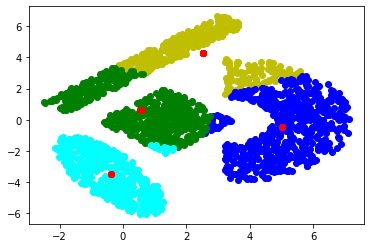

In [124]:
color = ['y', 'blue', 'green', 'cyan', 'black', 'brown']
for m in range(len(color)):
    id = []
    for i in range(len(C)):
        if (C1[i] == m):
            id.append(i)
    plt.scatter(data1.loc[id][0],data1.loc[id][1], c = color[m])
    plt.scatter(centroid1.loc[:][0],centroid1.loc[:][1], c = 'r')

In [125]:
centroid1

,0,1
C,,
0,2.508227,4.295376
1,5.022215,-0.490464
2,0.553067,0.624116
3,-0.380149,-3.478974


In [126]:
price1

14319.040677503675